In [10]:
using Causality, IntervalUnionArithmetic

┌ Info: Precompiling Causality [943c2df0-3341-4665-8895-8aff0dd63d80]
└ @ Base loading.jl:1423
  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **



In [45]:
T, N = 20.0, 50
ρ = 5/N
G = Causality.makeGNP(N,ρ)

{50, 242} directed sparse Int64 graph
⠊⠀⠀⠄⠁⠀⠒⠁⠠⠨⠀⠈⠀⠐⠀⠀⠀⠘⢀⠂⠐⡀⠀⢐⡀
⠀⠄⠀⠀⠐⠊⠀⠀⠂⠀⠀⠀⠀⠌⠀⠀⠀⠀⠀⠀⠩⡈⠈⡀⠄
⠁⠀⡰⠀⡀⠈⠆⠠⠀⠠⠀⠰⠠⠀⠠⠀⡅⠀⢄⠂⢐⡂⠈⡈⠁
⠜⠀⠀⠀⠈⡁⡀⠈⠀⠄⠀⠀⠰⠀⡀⠔⠁⠂⠀⠀⠀⠰⠤⠀⢠
⡀⡂⠈⠀⠀⡀⠀⠄⠄⡡⢆⢀⠀⠀⠈⠌⠂⠈⢤⠀⠀⠀⡀⠂⠠
⡀⠀⠀⠀⢀⡀⠀⠀⠈⢑⠀⠀⠀⠀⠠⠀⠀⠈⠠⠈⠂⠀⠀⠀⠐
⢀⠀⡀⠄⠀⠂⠐⠂⠀⠀⠀⠀⠀⠀⡄⢀⠀⡂⠀⠀⠀⠀⠀⠀⠂
⠀⠀⠀⠀⠀⠂⢀⠌⡂⠄⠀⠂⠀⢉⠀⠀⠀⠀⠪⠀⠈⡀⠀⡀⠀
⣀⠀⠀⠀⠁⠉⠡⠀⡈⠀⡀⠀⠠⠠⠀⠀⠊⠀⠀⠀⠀⠀⠂⠐⠈
⠠⠐⠀⠀⠠⠑⠀⠀⠀⠓⡀⠂⠀⠀⠊⠂⠀⠀⢀⠐⡀⠁⠐⠀⠠
⠐⠠⡃⠢⠰⠰⢀⡀⠀⠀⠈⠀⠀⠀⠂⠠⠀⠀⠄⠈⢀⠐⢀⠄⠀
⢀⢀⠂⠠⡂⠠⠀⠃⠠⠈⠀⠀⠀⠀⠀⠠⢈⠀⠐⠀⠀⠔⠠⠂⠄
⠀⠈⠀⠁⠁⠀⠀⠒⠀⠂⠐⠀⠈⠀⠀⠀⠂⠀⠀⠂⠀⠀⠀⠁⠀

In [46]:
getpargen(inf_out::GaussianRate, lat_gen::GaussianRate, rec_gen::GaussianRate) = 
    [inf_out.a inf_out.b inf_out.c lat_gen.a lat_gen.b lat_gen.c rec_gen.a rec_gen.b rec_gen.c]


getpar(pseed,autoinf::GaussianRate,inf_in::GaussianRate, latency::GaussianRate, recov::GaussianRate) = 
    [fill(pseed, 1, N);
     fill(autoinf.a, 1, N); fill(autoinf.b, 1, N); fill(autoinf.c, 1, N);
     fill(inf_in.a,   1, N); fill(inf_in.b, 1, N); fill(inf_in.c, 1, N);
     fill(latency.a, 1, N); fill(latency.b, 1, N); fill(latency.c, 1, N);
     fill(recov.a, 1, N); fill(recov.b, 1, N); fill(recov.c, 1, N)
    ]

getpar (generic function with 1 method)

In [47]:
#Initialize generation parameters
ε = 1e-10
λ = 0.6
pseed = 10/N 
autoinf = GaussianRate(ε, T/2, 1/ε)
inf_in = GaussianRate(1.0, T/2, 1/ε)
latency = GaussianRate(1., T/2, 1/ε)
recov = GaussianRate(1., T/2, 1/ε)

inf_out = GaussianRate(λ, 4., 3.)
l_delay = GaussianRate(0.8, 2., 3.)
r_delay = GaussianRate(0.1, 6., 4.)

θp = getpar(pseed, autoinf, inf_in, latency, recov);
θpgen = getpargen(inf_out, l_delay, r_delay);

In [48]:
θpgen

1×9 Matrix{Float64}:
 0.6  4.0  3.0  0.8  2.0  3.0  0.1  6.0  4.0

In [49]:
#Initialize min/max boundaies
pseed_min = ε
pseed_max = 1-ε
rate_min = GaussianRate(ε  ,  -T,   ε)
rate_max = GaussianRate(1/ε  ,  2T,   1/ε)

θmin = getpar(pseed_min , rate_min, rate_min, rate_min, rate_min);
θmax = getpar(pseed_max , rate_max, rate_max, rate_max, rate_max);

rate_min = GaussianRate(ε  ,  -T,   ε)
rate_max = GaussianRate(3.  ,  T,   T)

θgenmin = getpargen(rate_min, rate_min, rate_min);
θgenmax = getpargen(rate_max, rate_max, rate_max);

In [50]:
const I = InferentialSEIR{GaussianRate,GaussianRate,GaussianRate,GaussianRate,GaussianRate,GaussianRate,GaussianRate}

InferentialSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}

In [51]:
Mp = StochasticModel(I, T, θp, G, θpgen);
sample! = Sampler(Mp);

In [52]:
xtrue = zeros(N,3)
sample!(xtrue)
nobs, p = 5, 1e-6
O = [(ti = T*(1+rand())/2; (i,xtrue[i,2] < ti < xtrue[i,3],ti,p)) for i=1:nobs]

5-element Vector{Tuple{Int64, Bool, Float64, Float64}}:
 (1, 1, 12.34179015847689, 1.0e-6)
 (2, 0, 16.288108997022785, 1.0e-6)
 (3, 0, 14.90479805033786, 1.0e-6)
 (4, 1, 14.332931616478863, 1.0e-6)
 (5, 1, 12.072620977794205, 1.0e-6)

In [53]:
#Initialize softened model
T = Float64(T)
ε = 2e-3

inf_out = GaussianRate(0.1, 7., 6.)
l_delay = GaussianRate(1/2, 7., 5.)
r_delay = GaussianRate(1/2, 4., 4.)

autoinf = GaussianRate(ε, T/2, 1/ε)

θp2 = getpar(pseed, autoinf, inf_in, latency, recov);
Mp2 = StochasticModel(I, T, θp2, G, θpgen);

In [54]:
#Initialize the parameters to learn

autoinf = GaussianRate(1/N, T/2, 2T)
inf_in = GaussianRate(1.0, T/2, 2T)
latency = GaussianRate(1., T/2, 2T)
recov = GaussianRate(1., T/2, 2T)


θ = getpar(pseed, autoinf, inf_in,  latency, recov);
M = StochasticModel(I, T, θ, G, θpgen);

In [55]:
using ProgressMeter
ProgressMeter.ijulia_behavior(:clear)
descend!(Mp2, O; M=M, numsamples=1000, numiters=100, 
         θmin=θmin, θmax=θmax,θgenmin=θgenmin, θgenmax=θgenmax, descender=SignDescender(0.1),
         hyperdescender=SignDescender(0.0),learnhyper=1);
descend!(Mp2, O; M=M, numsamples=1000, numiters=100, 
         θmin=θmin, θmax=θmax,θgenmin=θgenmin, θgenmax=θgenmax, descender=SignDescender(0.03));

Progress:  69%|████████████████████████████▎            |  ETA: 0:00:18
  F:  6.666427940036418

LoadError: TaskFailedException

[91m    nested task error: [39mInterruptException:
    Stacktrace:
      [1] [0m[1mreshape[22m
    [90m    @ [39m[90m./[39m[90m[4mreshapedarray.jl:51[24m[39m[90m [inlined][39m
      [2] [0m[1mreshape[22m
    [90m    @ [39m[90m./[39m[90m[4mreshapedarray.jl:111[24m[39m[90m [inlined][39m
      [3] [0m[1mreshape[22m
    [90m    @ [39m[90m./[39m[90m[4mreshapedarray.jl:141[24m[39m[90m [inlined][39m
      [4] [0m[1m_maybe_reshape_parent[22m
    [90m    @ [39m[90m./[39m[90m[4msubarray.jl:124[24m[39m[90m [inlined][39m
      [5] [0m[1mview[22m
    [90m    @ [39m[90m./[39m[90m[4msubarray.jl:178[24m[39m[90m [inlined][39m
      [6] [0m[1mmaybeview[22m
    [90m    @ [39m[90m./[39m[90m[4mviews.jl:146[24m[39m[90m [inlined][39m
      [7] [0m[1mindividual[22m[0m[1m([22m[90m#unused#[39m::[0mType[90m{InferentialSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}}[39m, [90mθi[39m::[0mSubArray[90m{Float64, 1, Matrix{Float64}, Tuple{Base.Slice{Base.OneTo{Int64}}, Int64}, true}[39m, [90mθgen[39m::[0mMatrix[90m{Float64}[39m[0m[1m)[22m
    [90m    @ [39m[35mCausality[39m [90m~/git/Causality/src/[39m[90m[4mseir.jl:24[24m[39m
      [8] [0m[1mindividual[22m[90m (repeats 2 times)[39m
    [90m    @ [39m[90m~/git/Causality/src/[39m[90m[4mstochasticmodel.jl:16[24m[39m[90m [inlined][39m
      [9] [0m[1m(::Causality.var"#sample!#42"{StochasticModel{InferentialSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}}, Causality.var"#updateQ!#41"{StochasticModel{InferentialSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}}, TrackingHeaps.TrackingHeap{Int64, Float64, 2, TrackingHeaps.MinHeapOrder, TrackingHeaps.NoTrainingWheels}}, TrackingHeaps.TrackingHeap{Int64, Float64, 2, TrackingHeaps.MinHeapOrder, TrackingHeaps.NoTrainingWheels}, Vector{Int64}, Int64})[22m[0m[1m([22m[90mx[39m::[0mMatrix[90m{Float64}[39m[0m[1m)[22m
    [90m    @ [39m[35mCausality[39m [90m~/git/Causality/src/[39m[90m[4mseir.jl:82[24m[39m
     [10] [0m[1mmacro expansion[22m
    [90m    @ [39m[90m~/git/Causality/src/[39m[90m[4mvariation.jl:50[24m[39m[90m [inlined][39m
     [11] [0m[1m(::Causality.var"#11#threadsfor_fun#24"{StochasticModel{InferentialSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}}, Int64, StochasticModel{InferentialSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}}, Vector{Tuple{Int64, Bool, Float64, Float64}}, Matrix{Float64}, Vector{Causality.var"#sample!#42"{StochasticModel{InferentialSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}}, Causality.var"#updateQ!#41"{StochasticModel{InferentialSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}}, TrackingHeaps.TrackingHeap{Int64, Float64, 2, TrackingHeaps.MinHeapOrder, TrackingHeaps.NoTrainingWheels}}, TrackingHeaps.TrackingHeap{Int64, Float64, 2, TrackingHeaps.MinHeapOrder, TrackingHeaps.NoTrainingWheels}, Vector{Int64}, Int64}}, Vector{Float64}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, UnitRange{Int64}})[22m[0m[1m([22m[90monethread[39m::[0mBool[0m[1m)[22m
    [90m    @ [39m[35mCausality[39m [90m./[39m[90m[4mthreadingconstructs.jl:85[24m[39m
     [12] [0m[1m(::Causality.var"#11#threadsfor_fun#24"{StochasticModel{InferentialSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}}, Int64, StochasticModel{InferentialSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}}, Vector{Tuple{Int64, Bool, Float64, Float64}}, Matrix{Float64}, Vector{Causality.var"#sample!#42"{StochasticModel{InferentialSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}}, Causality.var"#updateQ!#41"{StochasticModel{InferentialSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}}, TrackingHeaps.TrackingHeap{Int64, Float64, 2, TrackingHeaps.MinHeapOrder, TrackingHeaps.NoTrainingWheels}}, TrackingHeaps.TrackingHeap{Int64, Float64, 2, TrackingHeaps.MinHeapOrder, TrackingHeaps.NoTrainingWheels}, Vector{Int64}, Int64}}, Vector{Float64}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, UnitRange{Int64}})[22m[0m[1m([22m[0m[1m)[22m
    [90m    @ [39m[35mCausality[39m [90m./[39m[90m[4mthreadingconstructs.jl:52[24m[39m

In [56]:
function histo(v; bins=20, up=1.0)
    h = zeros(bins+1)
    z = length(v)
    for x in v
        h[floor(Int, x*bins/up)+1]+=1/z
    end
    h
end

histo (generic function with 1 method)

In [57]:
stats = post(Mp, O, numsamples=10000);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:35


In [58]:
statscau = prior(M);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1423
┌ Info: Precompiling GR_jll [d2c73de3-f751-5644-a686-071e5b155ba9]
└ @ Base loading.jl:1423


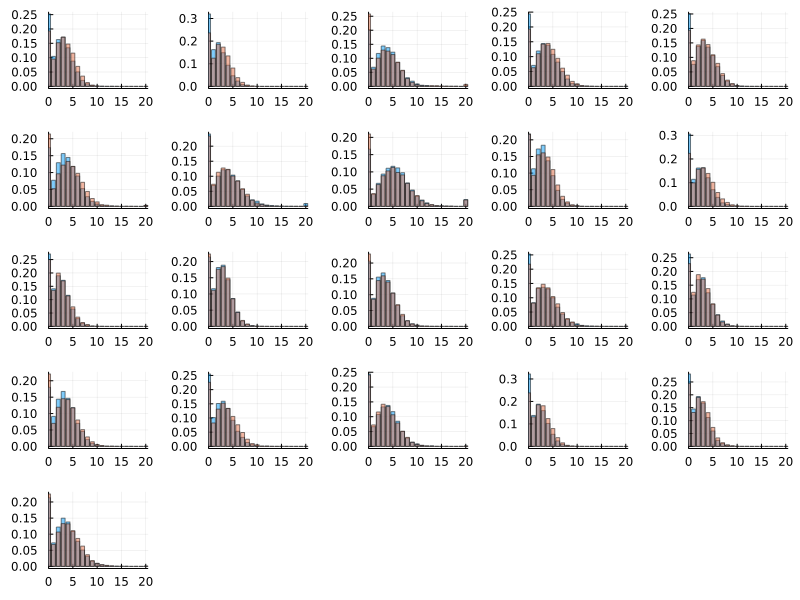

In [59]:
using Plots
state = 1
pl = map(1:21) do k
    p = plot()
    bar!(p, 0:M.T/20:M.T, histo((@view statscau[:, k, state]), up=M.T), alpha=0.5, xlims=(0,M.T+0.5), bins=20, label="cau", legend=false);
    bar!(p, 0:M.T/20:M.T, histo((@view stats[:, k, state]), up=M.T),    alpha=0.5, xlims=(0,M.T+0.5), bins=20, label="true", legend=false);
end;
savefig("marginals.pdf")
plot(pl..., size=(800,600))

## Marginals and ROC curve

In [60]:
function marginal(i, t, stats)
    numsamp = size(stats,1)
    sum( stats[:,i,2] .< t .< stats[:,i,3] ) / numsamp
end

function tpr(xtrue, rank) 
    den = sum(xtrue[rank])
    if den != 0
        return cumsum(xtrue[rank]) ./ den
    else
        return ones(size(rank))
    end
end

function fpr(xtrue, rank) 
    N = size(rank,1)
    return (range(1,N,length=N) .- cumsum(xtrue[rank])) ./ (range(1,N,length=N) .- cumsum(xtrue[rank]) )[end]
end

function ROC(xtrue, p)
    N = size(xtrue,1)
    rank = sortperm(p, rev=true)
    
    return fpr(xtrue, rank) , tpr(xtrue, rank)
end

function AUROC(ROC)
    N = size(ROC[1],1) 
    AU = 0
    for t = 1:N-1
        AU += ROC[2][t] * (ROC[1][t+1] - ROC[1][t])
    end
    return AU
end

AUROC (generic function with 1 method)

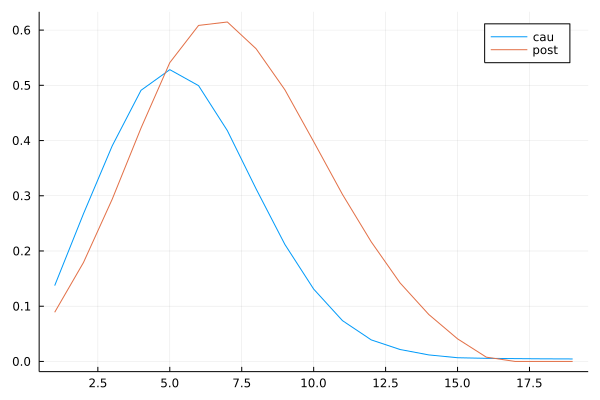

In [61]:
using Plots
p_cau = zeros(N,Int(T))
p_exact = zeros(N,Int(T))
for i = 1:N
    for t = 1:Int(T)
       p_cau[i,t] = marginal(i, t, statscau)
       p_exact[i,t] = marginal(i, t, stats)
    end
end
i = 2
plot(p_cau[i,1:end-1], label = "cau")
plot!(p_exact[i,1:end-1], label = "post")

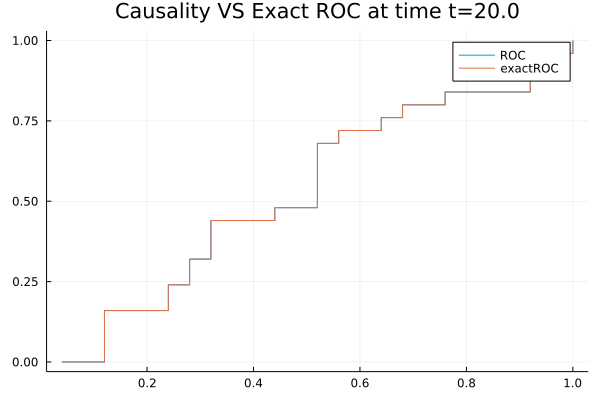

In [62]:
#Let us find the ROC of the infected individuals at time t
t = T
epidemic_risk=zeros(N)
true_risk=zeros(N)
for i=1:N
   epidemic_risk[i] = marginal(i,t,statscau)
   true_risk[i] = marginal(i,t,stats)
end
xt = xtrue[:,2] .< t-1e-3 .< xtrue[:,3]
plot(ROC(xt, epidemic_risk)[1],ROC(xt, epidemic_risk)[2], label="ROC", title="Causality VS Exact ROC at time t=$t")
plot!(ROC(xt, true_risk)[1],ROC(xt, true_risk)[2], label="exactROC")

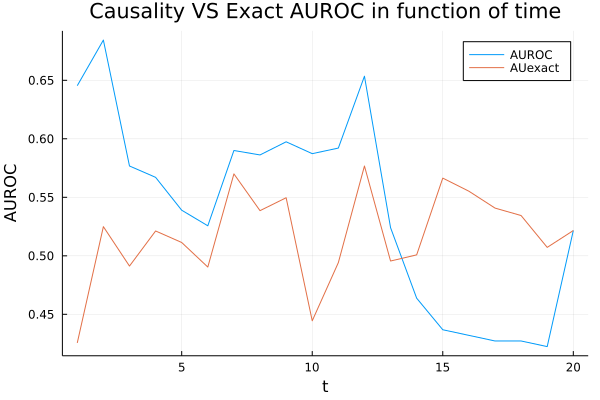

In [63]:
T = Int(T)
AU_curve=zeros(T)
AU_exact=zeros(T)
for t = 1:T
    epidemic_risk=zeros(N)
    true_risk=zeros(N)
    for i=1:N
       epidemic_risk[i] = marginal(i,t,statscau)
       true_risk[i] = marginal(i,t,stats)
    end
    xt = xtrue[:,2] .< t-1e-3 .< xtrue[:,3]
    AU_curve[t] = AUROC(ROC(xt, epidemic_risk))
    AU_exact[t] = AUROC(ROC(xt, true_risk))
end

plot(LinRange(1,T,T),AU_curve, label="AUROC", title="Causality VS Exact AUROC in function of time")
plot!(LinRange(1,T,T),AU_exact, label="AUexact")
T = Float64(T)
savefig("SEIR_AUROC.pdf")
xlabel!("t")
ylabel!("AUROC")